In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm



In [38]:
train_file = pd.read_csv('iot-datasets/train.csv')
test_file = pd.read_csv('iot-datasets/test.csv')
severity_type = pd.read_csv('iot-datasets/severity_type.csv')
event_type = pd.read_csv('iot-datasets/event_type.csv')
log_feature = pd.read_csv('iot-datasets/log_feature.csv')
resource_type = pd.read_csv('iot-datasets/resource_type.csv')
# volume = log_feature[['id','volume']]
# log_feature = log_feature.drop('volume', axis=1)

location = train_file[['id','location']]
train_file = train_file.drop('location',axis=1)
# location[location['id'] == 2]


In [39]:
train_file.sort_values(by='id',ascending=True)
# train_file[train_file['id']==6597]


,id,fault_severity
4407,1,1
5694,5,0
279,6,1
4370,8,0
2199,13,0
...,...,...
847,18539,0
3312,18542,0
7020,18543,1
4612,18548,0


In [40]:
print(f"severity_type shape:{severity_type.shape}" )
print(f"event_type shape:{event_type.shape}" )
print(f"log_feature shape:{log_feature.shape}" )
print(f"resource_type shape:{resource_type.shape}" )
# print(f"volume shape:{volume.shape}" )
print(f"location shape:{location.shape}" )
print(f"train shape:{train_file.shape}" )



severity_type shape:(18552, 2)
event_type shape:(31170, 2)
log_feature shape:(58671, 3)
resource_type shape:(21076, 2)
location shape:(7381, 2)
train shape:(7381, 2)


In [41]:
# print(severity_type['severity_type'].unique())
# print(resource_type['resource_type'].unique())
# print(volume['volume'].unique())
# print(event_type['event_type'].unique())
# print(log_feature['log_feature'].unique())
print(location['location'].unique())

#print out the count


['location 118' 'location 91' 'location 152' 'location 931' 'location 120'
 'location 664' 'location 640' 'location 122' 'location 263'
 'location 613' 'location 760' 'location 519' 'location 746'
 'location 1066' 'location 812' 'location 343' 'location 133'
 'location 976' 'location 948' 'location 808' 'location 894'
 'location 875' 'location 1024' 'location 166' 'location 687'
 'location 1016' 'location 707' 'location 978' 'location 775'
 'location 829' 'location 732' 'location 508' 'location 257'
 'location 116' 'location 830' 'location 491' 'location 253'
 'location 740' 'location 704' 'location 1089' 'location 653'
 'location 600' 'location 892' 'location 802' 'location 794'
 'location 477' 'location 684' 'location 895' 'location 496'
 'location 321' 'location 1107' 'location 1086' 'location 1099'
 'location 975' 'location 1019' 'location 342' 'location 744'
 'location 181' 'location 1052' 'location 696' 'location 1008'
 'location 798' 'location 777' 'location 95' 'location 699' '

In [42]:
severity_type.sort_values(by='id',ascending=True)


,id,severity_type
10448,1,severity_type 1
8351,2,severity_type 2
10957,3,severity_type 1
11106,4,severity_type 4
7736,5,severity_type 2
...,...,...
5863,18548,severity_type 2
7804,18549,severity_type 1
3262,18550,severity_type 1
16278,18551,severity_type 1


In [43]:
location.sort_values(by='id',ascending=True)


,id,location
4407,1,location 601
5694,5,location 460
279,6,location 332
4370,8,location 243
2199,13,location 418
...,...,...
847,18539,location 147
3312,18542,location 495
7020,18543,location 998
4612,18548,location 278


In [44]:
event_type.sort_values(by='id',ascending=True).head(10)


,id,event_type
18299,1,event_type 11
18300,1,event_type 13
14535,2,event_type 35
14536,2,event_type 34
19226,3,event_type 11
19536,4,event_type 47
13306,5,event_type 34
13307,5,event_type 35
10912,6,event_type 34
19179,7,event_type 42


In [45]:
log_feature.sort_values(by='id',ascending=True).head(10)


,id,log_feature,volume
36199,1,feature 179,1
36197,1,feature 68,2
36198,1,feature 345,2
27668,2,feature 312,1
27670,2,feature 233,1
27669,2,feature 235,1
27667,2,feature 315,1
27671,2,feature 313,1
37671,3,feature 171,2
38197,4,feature 370,3


In [46]:
resource_type.sort_values(by='id',ascending=True).head(10)


,id,resource_type
11285,1,resource_type 6
11284,1,resource_type 8
9069,2,resource_type 2
11953,3,resource_type 8
12102,4,resource_type 2
8443,5,resource_type 2
7090,6,resource_type 2
11928,7,resource_type 2
5927,8,resource_type 2
2940,9,resource_type 8


In [47]:
location.sort_values(by='id',ascending=True).head(10)


,id,location
4407,1,location 601
5694,5,location 460
279,6,location 332
4370,8,location 243
2199,13,location 418
500,19,location 644
4591,20,location 79
4829,23,location 257
7051,24,location 367
5446,26,location 238


In [48]:
severity_type.drop_duplicates(keep='first')
event_type.drop_duplicates(keep='first')
resource_type.drop_duplicates(keep='first')
log_feature.drop_duplicates(keep='first')
# volume.drop_duplicates(keep='first')

print(f"severity_type shape:{severity_type.shape}" )
print(f"event_type shape:{event_type.shape}" )
print(f"log_feature shape:{log_feature.shape}" )
print(f"resource_type shape:{resource_type.shape}" )
# print(f"volume shape:{volume.shape}" )
log_feature


severity_type shape:(18552, 2)
event_type shape:(31170, 2)
log_feature shape:(58671, 3)
resource_type shape:(21076, 2)


,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
...,...,...,...
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1


In [49]:
severity_type = severity_type.pivot_table(index='id', columns='severity_type', aggfunc='size')
severity_type.reset_index(inplace=True)

event_type = event_type.pivot_table(index='id', columns='event_type', aggfunc='size')
event_type.reset_index(inplace=True)

resource_type = resource_type.pivot_table(index='id', columns='resource_type', aggfunc='size')
resource_type.reset_index(inplace=True)

log_feature = log_feature.pivot(index='id', columns='log_feature', values='volume')
log_feature.reset_index(inplace=True)

location = location.pivot_table(index='id', columns='location', aggfunc='size')
location.reset_index(inplace=True)

# prefix = 'Volume '
# volume['volume'] = volume['volume'].apply(lambda x: prefix + str(x))
# volume = volume.pivot_table(index='id', columns='volume', aggfunc='size')
# volume.reset_index(inplace=True)

#keep volume columns since it is associated with log feature
# log_feature[log_feature['id']==6597]['feature 68']
# log_feature
#this is already one hot encoded


In [50]:
log_feature[log_feature['id']==6597]['feature 68']
log_feature


log_feature,id,feature 1,feature 10,feature 100,feature 101,feature 102,feature 103,feature 104,feature 105,feature 106,...,feature 90,feature 91,feature 92,feature 93,feature 94,feature 95,feature 96,feature 97,feature 98,feature 99
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18547,18548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18548,18549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18549,18550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18550,18551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df = pd.merge(train_file,severity_type,on='id',how='left')
df = pd.merge(df,event_type,on='id',how='left')
df = pd.merge(df,resource_type,on='id',how='left')
df = pd.merge(df,log_feature,on='id',how='left')
# df = pd.merge(df,volume,on='id',how='left')
df_with_location = pd.merge(df,location,on='id',how='left')
df_without_location = df



In [52]:
df = df_with_location
# df = df_without_location
df


,id,fault_severity,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,event_type 1,event_type 10,event_type 11,...,location 987,location 989,location 99,location 990,location 991,location 994,location 995,location 996,location 998,location 999
0,14121,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9320,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14394,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8218,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14804,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,870,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7377,18068,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7378,14111,2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7379,15189,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.isnull().sum()


id                    0
fault_severity        0
severity_type 1    4006
severity_type 2    3790
severity_type 3    7377
                   ... 
location 994       7376
location 995       7341
location 996       7377
location 998       7370
location 999       7375
Length: 1385, dtype: int64

In [54]:
df.fillna(0, inplace=True)
df.isnull().sum()


id                 0
fault_severity     0
severity_type 1    0
severity_type 2    0
severity_type 3    0
                  ..
location 994       0
location 995       0
location 996       0
location 998       0
location 999       0
Length: 1385, dtype: int64

In [55]:
df.shape


(7381, 1385)

In [56]:
df


,id,fault_severity,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,event_type 1,event_type 10,event_type 11,...,location 987,location 989,location 99,location 990,location 991,location 994,location 995,location 996,location 998,location 999
0,14121,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9320,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14394,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8218,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14804,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,870,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7377,18068,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7378,14111,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,15189,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if column != 'id' or column!='fault_severity':
        df[column] = label_encoder.fit_transform(df[column])



In [58]:
# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse=False)
# columns_to_encode = [col for col in df.columns if col not in ['id', 'fault_severity']]
# df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[columns_to_encode]))
# df_encoded.columns = one_hot_encoder.get_feature_names_out(input_features=columns_to_encode)
# df_encoded[['id', 'fault_severity']] = df[['id', 'fault_severity']]
# df = df_encoded



In [59]:
df


,id,fault_severity,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,event_type 1,event_type 10,event_type 11,...,location 987,location 989,location 99,location 990,location 991,location 994,location 995,location 996,location 998,location 999
0,5623,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3730,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5732,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3284,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5886,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,338,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7377,7188,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7378,5622,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7379,6034,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df.dtypes


id                 int64
fault_severity     int64
severity_type 1    int64
severity_type 2    int64
severity_type 3    int64
                   ...  
location 994       int64
location 995       int64
location 996       int64
location 998       int64
location 999       int64
Length: 1385, dtype: object

## Split dataset

In [61]:
y = df['fault_severity']
X = df.drop(['fault_severity','id'], axis=1)
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))


Number of examples: 7381

Number of Features:1383


In [62]:
X_train,X_test, y_train,y_test =  train_test_split(X,y, test_size=0.33,random_state=1234)


## Logistic regression

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4945, 1383)
(4945,)
(2436, 1383)
(2436,)


In [64]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)


/Users/ghomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
from sklearn.metrics import accuracy_score, classification_report
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print('Accuracy score of Logistic regression: ' + str(lr_accuracy))


Accuracy score of Logistic regression: 0.7064860426929392


## KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)


/Users/ghomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
print('Accuracy score of KNN: ' + str(knn_accuracy))


Accuracy score of KNN: 0.7192118226600985


## Decision Tree

In [68]:
param_grid = {'max_depth':[4,8],'min_samples_leaf':[25,50]}
print('Running grid search')
dt_regressor = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_regressor,param_grid,cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train,y_train)
print('finished grid search')


#get the best parameters for decision tree
dt_best_params= dt_grid_search.best_params_
print(f"best parameters for decision tree model: {dt_best_params}")
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)
y_dt_pred =dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_dt_pred)




Running grid search
finished grid search
best parameters for decision tree model: {'max_depth': 4, 'min_samples_leaf': 50}


In [69]:
print("Accuracy of Decision Tree:", dt_accuracy)


Accuracy of Decision Tree: 0.729064039408867


## Random Forest

In [70]:
param_grid = {'max_depth':[4,8,10,20,32],'n_estimators':[25,50,100,200,300]}
print('Running grid search')
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model,param_grid,cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train,y_train)
print('finished grid search')

rf_best_params= rf_grid_search.best_params_
print(f"best parameters for rf model: {rf_best_params}")
rf_model = RandomForestClassifier(max_depth=rf_best_params['max_depth'],n_estimators = rf_best_params['n_estimators'])
rf_model.fit(X_train, y_train)
y_rf_pred=rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)


Running grid search
finished grid search
best parameters for rf model: {'max_depth': 32, 'n_estimators': 25}


In [71]:
print("Accuracy of Random Forest:", rf_accuracy)


Accuracy of Random Forest: 0.7380952380952381


## GBDT

In [72]:

param_grid = {'max_depth':[4,8,10],'n_estimators':[25,50,100,200,300]}
print('Running grid search')
gbdt_model = GradientBoostingClassifier()
GBDT_grid = GridSearchCV(gbdt_model,param_grid,cv=3, scoring='neg_root_mean_squared_error')
GBDT_grid_search = GBDT_grid.fit(X_train,y_train)
print('finished grid search')


GBDT_best_params= GBDT_grid_search.best_params_
print(f"best parameters for GBDT model: {GBDT_best_params}")

gbdt_model = GradientBoostingClassifier(max_depth=GBDT_best_params['max_depth'], n_estimators=GBDT_best_params['n_estimators'])
gbdt_model.fit(X_train,y_train)
y_gbdt_pred =  gbdt_model.predict(X_test)


Running grid search
finished grid search
best parameters for GBDT model: {'max_depth': 4, 'n_estimators': 200}


In [73]:
gbdt_accuracy = accuracy_score(y_test, y_gbdt_pred)
print("Accuracy:", gbdt_accuracy)


Accuracy: 0.7504105090311987


## Naive Bayes

In [74]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("Accuracy:", nb_accuracy)


Accuracy: 0.5024630541871922


## SVM

In [75]:
svm_model_linear = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
svm_y_pred = svm_model_linear.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)


In [76]:
print("Accuracy of SVM:", svm_accuracy)


Accuracy of SVM: 0.6461412151067324


In [77]:
feature_imp = gbdt_model.feature_importances_
df_features = pd.DataFrame({'name':X_train.columns.values, 'imp':feature_imp})
df_sorted =df_features.sort_values(by=['imp'],  ascending=False)
top_five = df_sorted.iloc[:6]['name'].tolist()
print('Top five features: {0}'.format(top_five))


Top five features: ['feature 203', 'severity_type 1', 'feature 170', 'feature 312', 'feature 73', 'feature 82']


Text(0, 0.5, 'Normalized importance')

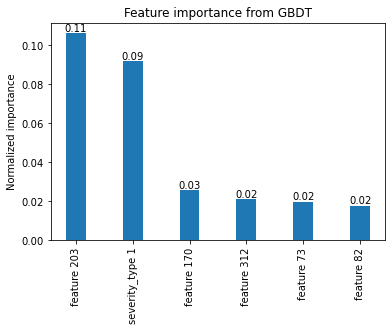

In [78]:
fig, ax = plt.subplots()
ax.bar(np.arange(6), sorted(rf_model.feature_importances_, reverse=True)[:6], width = 0.35)
ax.set_xticks(np.arange(6))
ax.set_xticklabels(top_five, rotation = 90)

for i, v in enumerate(sorted(rf_model.feature_importances_, reverse=True)[:6]):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.title('Feature importance from GBDT')
ax.set_ylabel('Normalized importance')


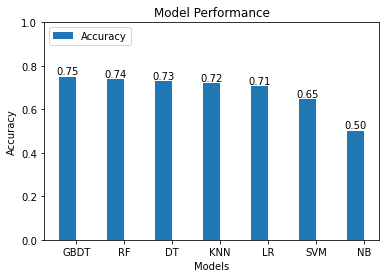

In [79]:
accuracy_results = [lr_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, gbdt_accuracy, nb_accuracy, svm_accuracy]
labels = ['LR', 'KNN', 'DT', 'RF', 'GBDT', 'NB', 'SVM']
label_accuracy_pairs = list(zip(labels, accuracy_results))
sorted_label_accuracy_pairs = sorted(label_accuracy_pairs, key=lambda x: x[1], reverse=True)
accuracy_results = [pair[1] for pair in sorted_label_accuracy_pairs]

labels = [pair[0] for pair in sorted_label_accuracy_pairs]

rg= np.arange(7)
width = 0.35
plt.bar(rg, accuracy_results, width, label="Accuracy")
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim([0,1])

for i, v in enumerate(accuracy_results):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')


plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()
